# Steepest Descent

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

Here's a function. It's an oblong bowl made of two quadratic functions.

This is pretty much the easiest 2D optimization job out there.

In [2]:
def f(x):
    return (x[0]-1)**2 + (x[1]-1)**2

def df(x):
    return np.array([2*(x[0]-1),2*(x[1]-1) ])

In [8]:
def f(x):
    return 0.5*x[0]**2 + 10*x[1]**2

def df(x):
    return np.array([x[0], 20*x[1]])

Let's take a look at the function. First in 3D:

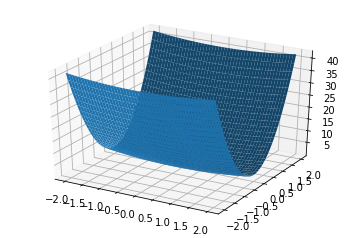

In [9]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh);
#ax.contourf(xmesh, ymesh, fmesh)

And then as a "contour plot":

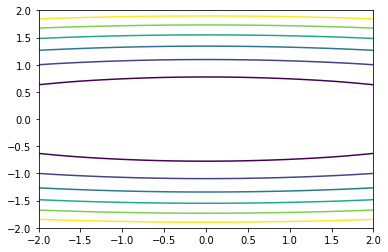

In [11]:
#pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Next, initialize steepest descent with a starting guess:

In [62]:
guesses = [np.array([2, 2./5])]

Next, run Steepest Descent:

In [74]:
#clear
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)
## Line  search
alpha_opt = sopt.golden(f1d)

## Steepest descent update
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[ 0.0311852   0.00623704]


Here's some plotting code to illustrate what just happened:

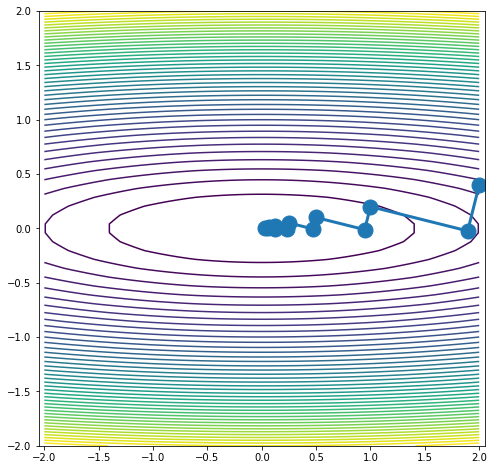

In [75]:
pt.figure(figsize=(8,8))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "o-", lw=3, ms=15)

In [76]:
guesses

[array([ 2. ,  0.4]),
 array([ 1.894081  , -0.02367602]),
 array([ 0.99965399,  0.19993077]),
 array([ 0.94671281, -0.01183391]),
 array([ 0.49965399,  0.0999308 ]),
 array([ 0.47319256, -0.00591491]),
 array([ 0.24974055,  0.0499481 ]),
 array([ 0.23651442, -0.00295643]),
 array([ 0.12482709,  0.02496541]),
 array([ 0.11821631, -0.0014777 ]),
 array([ 0.06239197,  0.01247839]),
 array([ 0.05908772, -0.0007386 ]),
 array([ 0.0311852 ,  0.00623704])]

In [77]:
error = [np.linalg.norm(g) for g in guesses]

In [78]:
error = np.array(error)
error

array([ 2.03960781,  1.89422897,  1.01945104,  0.94678677,  0.50954909,
        0.47322953,  0.25468639,  0.23653289,  0.12729915,  0.11822555,
        0.06362757,  0.05909234,  0.03180279])

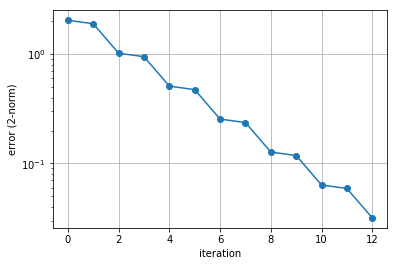

In [79]:
pt.semilogy(error, '-o')
pt.xlabel('iteration')
pt.ylabel('error (2-norm)')
pt.grid()

In [83]:
r=1
for k in range(len(error)-1):
    print(error[k+1]/error[k]**r)

0.928722159364
0.538187861149
0.928722164426
0.538187795827
0.92872215933
0.538187865239
0.928722164093
0.538187951278
0.928722169792
0.538188025157
0.928722174902
0.538188050137
